# Optimizing a function with `cvxpy`

In this notebook, we will use the `cvxpy` Python library to find the solution for a convex optimization problem. This library is specifically designed for convex optimization, so it's not recommended to use it unless you know your problem is convex.

In [1]:
!pip install cvxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 26.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 31.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.7 MB/s eta 0:00:00:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.1
    Uninstalling setuptools-65.5.1:
      Successfully uninstalled setuptools-65.5.1


In [2]:
import cvxpy as cp

## Example 1

Let's try and minimize the function 
$$
f(x,y) = (x-1)^2 + (y-2)^2 + 1
$$
on the rectangle given by 
$$
-5 \leq x \leq 5,\ -5 \leq y \leq 5
$$

The first thing we can do is visualize the function to get a feel for where the minimum should be. We'll recall this code from an earlier notebook.

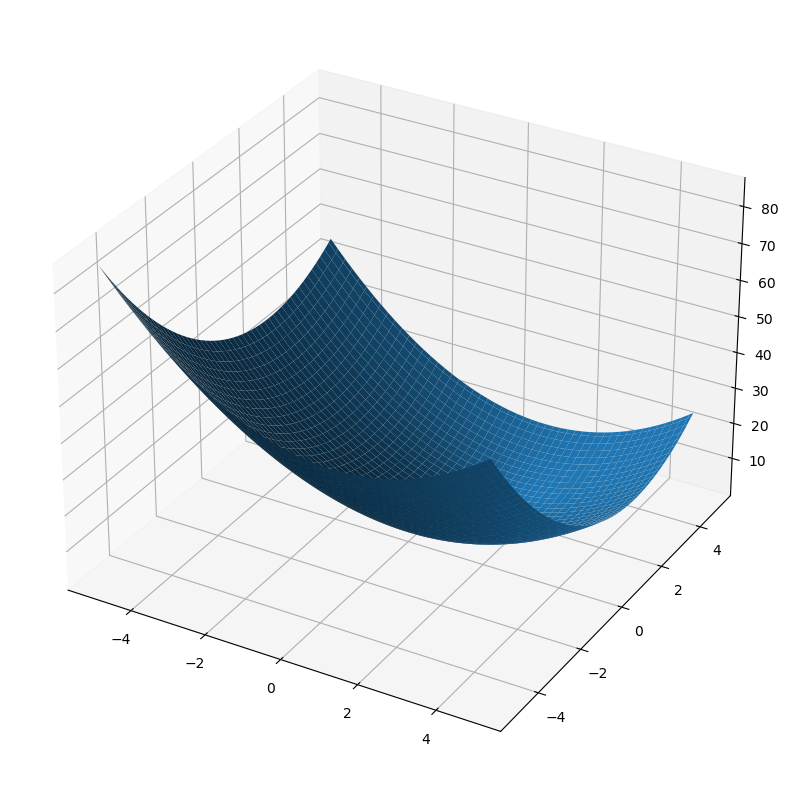

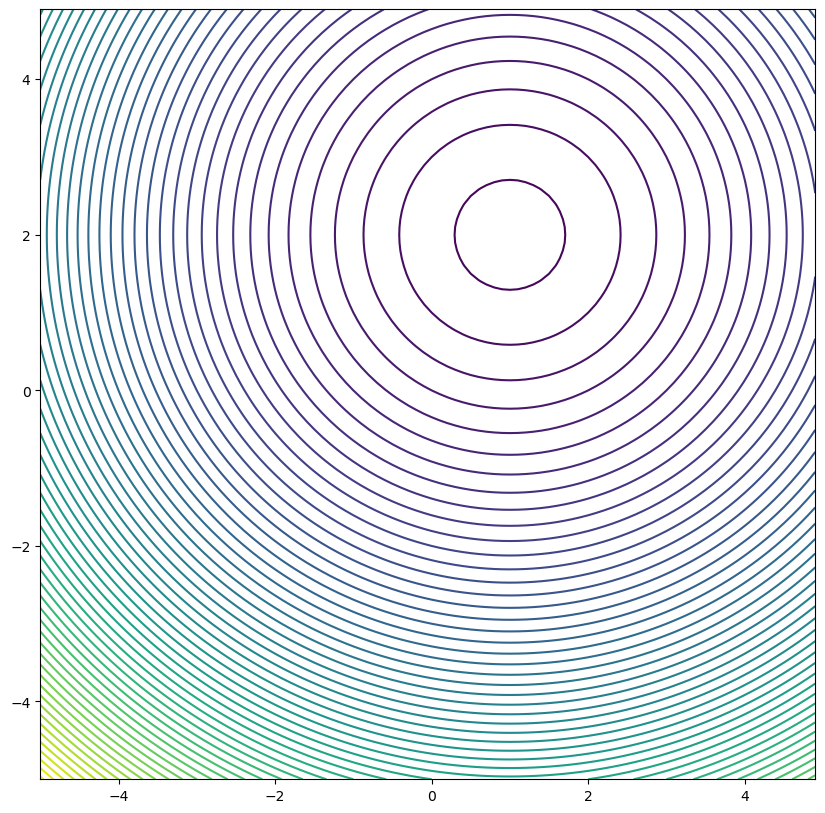

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-5,5,0.1)
Y = np.arange(-5,5,0.1)
x_coords, y_coords = np.meshgrid(X,Y)
Z = (x_coords-1)**2 + (y_coords-2)**2 + 1

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(x_coords, y_coords, Z)

plt.subplots(figsize=(10,10)) #trick to get bigger plots
plt.contour(
    x_coords, y_coords, Z, levels=80
)

There's a clear minimum to this function at (1,2) which we hope we will be able to find. Also, the picture should make it clear that the objective function is convex. Since the rectangle is also a convex set, we are in the right situation to do convex optimization.

Using `cvxpy` is very intutive. We first declare our variables. We can either create two variables or we can create a single variable which is a vector of length two. Let's do the latter since that will be good preparation for later on.

In [4]:
x = cp.Variable(2)

Let's add some constraints. You can code these very easily just using the appropriate symbols, but we do have to break up the inequalities.

In [5]:
constraints = [x[0] <= 5, x[1] <= 5, x[0] >= -5, x[1] >= -5]

We now craft our objective function $f$. Since we want to minimize it, we use the `cp.Minimize` function.

In [6]:
objective = cp.Minimize((x[0]-1)**2 + (x[1]-2)**2 + 1)

We create a `Problem` object to store the objective and constraints in.

In [7]:
problem = cp.Problem(objective, constraints)

Now all that remains to is to find the optimal solution. We will go over some optimization methods in class, but for now let's just ignore the actual method and ask `cvxpy` to solve it. You can actually change the solver `cvxpy` uses by giving it an argument. See [here](https://www.cvxpy.org/api_reference/cvxpy.problems.html#cvxpy.Problem.solve) for details if you're interested.

In [8]:
problem.solve()

1.0

What's printed above is the optimal value found (in this case, the minimum of $f$). To find the value of $x$, we simply check the value of the variable $x$ like so.

In [9]:
x.value

array([1., 2.])

As we can see, our solver found the correct solution.

# Example 2

Let's adapt the above example but this time, use an equality constraint. We'll allow $(x,y)$ to only vary over the line $y = - 2 x$. For context, here's how that looks.

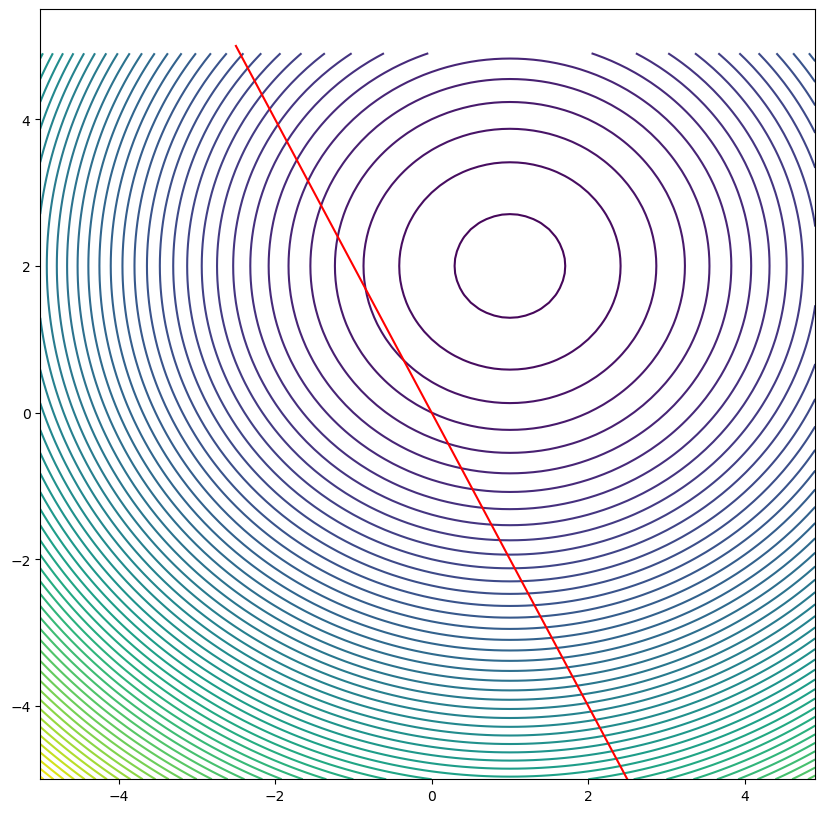

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-5,5,0.1)
Y = np.arange(-5,5,0.1)
x_coords, y_coords = np.meshgrid(X,Y)
Z = (x_coords-1)**2 + (y_coords-2)**2 + 1

plt.subplots(figsize=(10,10)) #trick to get bigger plots
plt.contour(
    x_coords, y_coords, Z, levels=80
)
plt.plot(
    [-2.5, 2.5],
    [-2*(-2.5), -2*(2.5)],
    c='red'
)

We proceed just as before, but with the equality constraint.

In [11]:
x = cp.Variable(2)
constraints = [x[1] == -2*x[0]]
objective = cp.Minimize((x[0]-1)**2 + (x[1]-2)**2 + 1)
problem = cp.Problem(objective, constraints)

In [12]:
problem.solve()

4.199999999999999

In [13]:
x.value

array([-0.6,  1.2])

Looking at the plot above, try and convince yourself that this makes sense. You can also just use calculus to solve this problem by substituting in $y=-2x$ into $f$.

## Example 3

Let's see what happens if we put constraints on our variable that give no feasible solutions, i.e. where no $(x,y)$ can even satisfy our constraints. To do this we'll insist that $x+y \geq 1$ but $3x + 3y \leq 2$.

In [14]:
x = cp.Variable(2)
constraints = [x[0]+x[1] >= 1, 3*x[0]+3*x[1] <= 2]
objective = cp.Minimize((x[0]-1)**2 + (x[1]-2)**2 + 1)
problem = cp.Problem(objective, constraints)

In [15]:
problem.solve()

inf

In [16]:
x.value

As you can see we get an optimal value of $\infty$ and no $x$ value. 

## Exercise 1

Use `cvxpy` to minimize the function
$$
f(x,y) = 2x + 3y
$$
under the constraint that $x^2 + y^2 \leq 1$. Show the minimum value of $f$ and the value of $(x,y)$ where it occurs.

In [18]:
x = cp.Variable(2)
constraints = [x[0]**2 + x[1]**2 <= 1]
objective = cp.Minimize(2*x[0] + 3*x[1])
problem = cp.Problem(objective, constraints)
problem.solve()

-3.605551261182062

In [19]:
x.value

array([-0.55470274, -0.83204859])

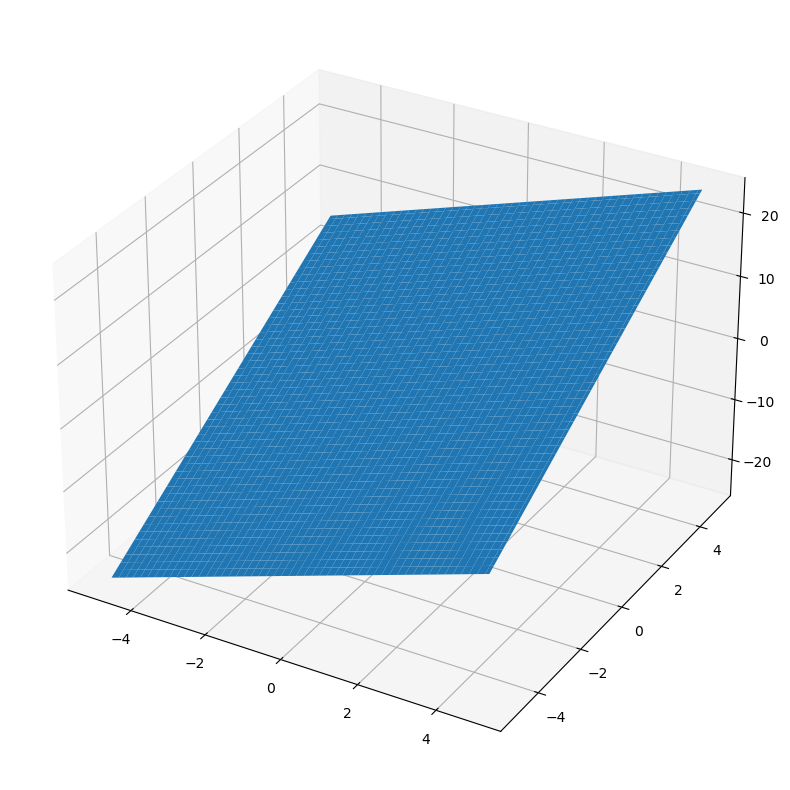

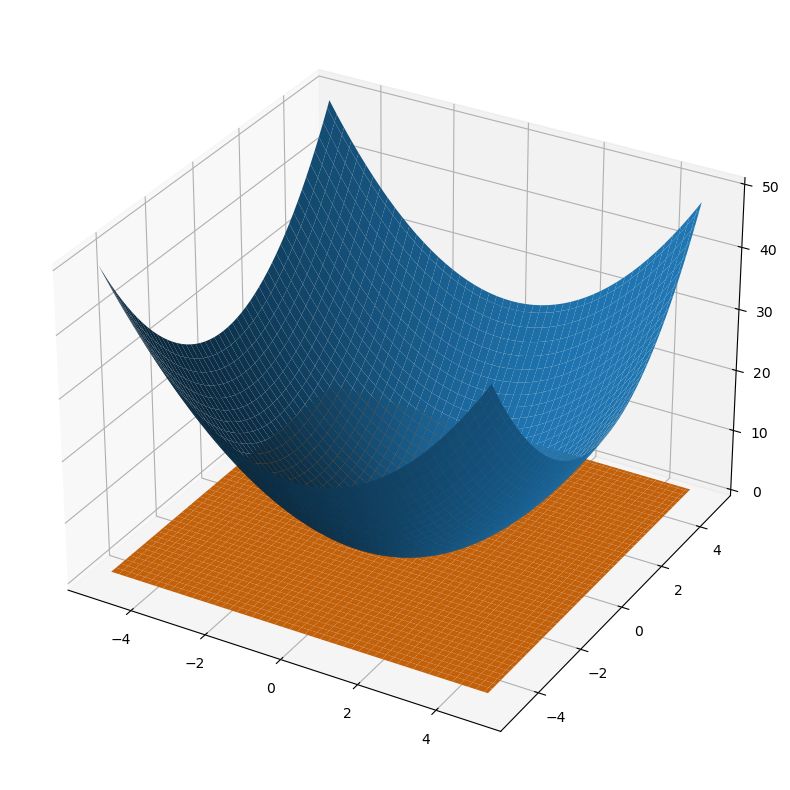

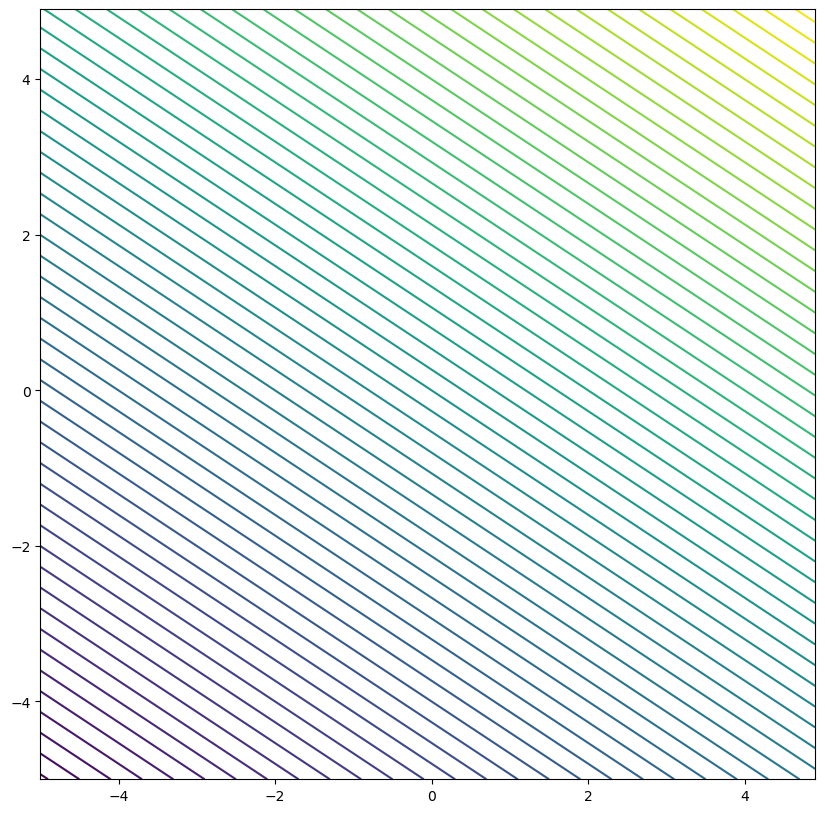

In [65]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5,5,.1)
y = np.arange(-5,5,.1)
x_coords, y_coords = np.meshgrid(X,Y)


x,y = np.meshgrid(x,y) #Make the 2D grid

#Apply those functions on the grid
f_1 = 2*(x_coords) + 3*(y_coords)
f_2 = (x_coords)**2 + (y_coords)**2
f_3 =  np.ones( (100,100) )

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

surf1 = ax.plot_surface(x_coords, y_coords, f_1)

fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

surf2 = ax2.plot_surface(x_coords, y_coords, f_2)
constraint = ax2.plot_surface(x_coords, y_coords, f_3)

plt.subplots(figsize=(10,10)) #trick to get bigger plots

plt.contour(
    x_coords, y_coords, f_1, levels=80
)


## Exercise 2

_Maximize_ the function $f: \mathbb{R}^3 \to \mathbb{R}$ given by
$$
f(x,y,z) = x - y - z^2
$$

under the constraint that all of $x$,$y$ and $z$ are in the interval $[-1,1]$.

In [67]:
x = cp.Variable(3)
constraints = [x[0] >= -1, x[0] <= 1, x[1] >= -1, x[1] <= 1, x[2] >= -1, x[2] <= 1]
objective = cp.Maximize(x[0] - x[1] - x[2]**2)
problem = cp.Problem(objective, constraints)
problem.solve()

2.0